# Implementation
- Here we implement a linear regression method on the Fish weight dataset. We'll be tryiing to predict the weight of the fish based on its various attributes like length and height. 

- We will be using a linear activation function for simplicity

- We will run the model to see how well its able to predict fish weights and use extensive visualization as sanity checks and a rudimentary judgement of the effectiveness. We'll also conduct sensitivity analysis to see how the prediction power differ when we change inputs like the learning rate.

- I'm also curious as to what standarization is used for in the context of fitting models, so I will be training models with and without standarization to see how they differ

# Define global Variables
- Here we will define global variables for convenience and consistency, of which there is only one:
    - global_epochs, the number of epochs to be ran for all linear regression models used

In [1]:
# Defining global variables

global_epochs = 100   # number of epochs to be run with all models

# 1- Importing necessary libraries and dataset
- we also get rid of any entries that contains 0 for any attributes to avoid runing into division by 0 later on

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from linear_regression_method import SingleNeuron


fish_data = pd.read_csv("../../data/Fish.csv")
initial_len = len(fish_data)
fish_data = fish_data[(fish_data != 0).all(axis=1)]
removed = initial_len - len(fish_data)

print(f"Removed {removed} rows with zero in any attribute.")

Removed 1 rows with zero in any attribute.


# 2 - Visualize each attribute against weight
- Since there are multiple attributes, we'll plot each of them against the independent variable to visually check if they are correlated with weight.

- Since linear regression relies on the asumption that the relationship between the independent and dependent variable is linear, we'll also have to confirm visually if this is the case

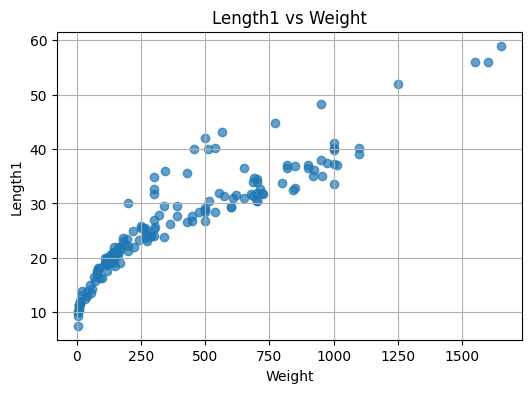

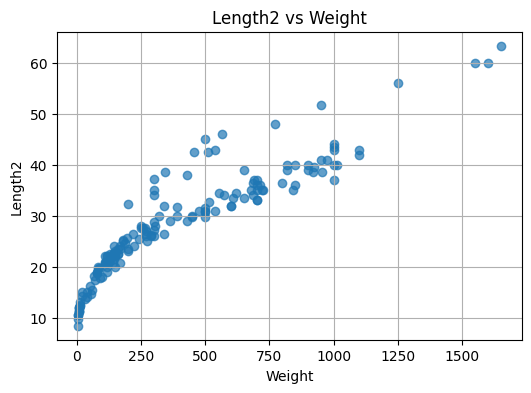

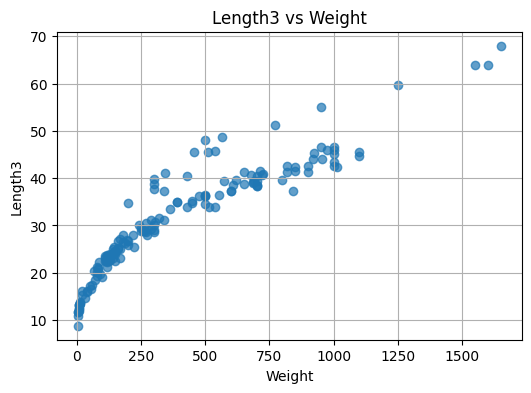

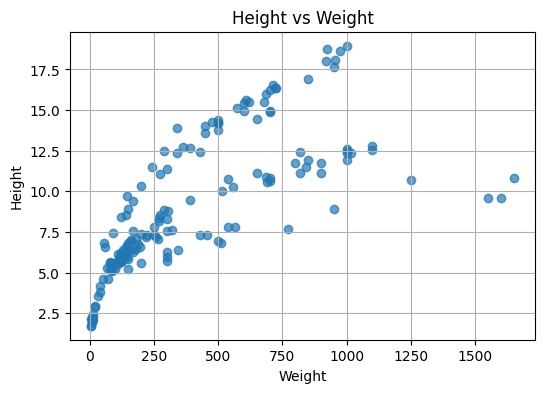

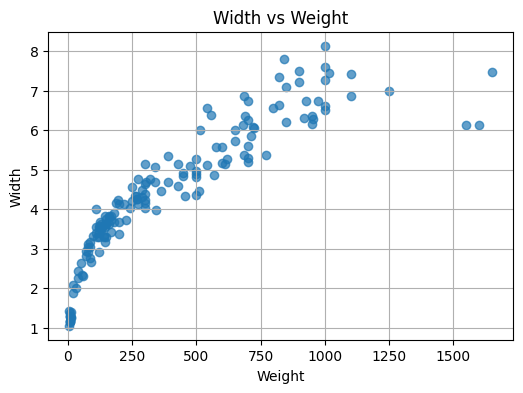

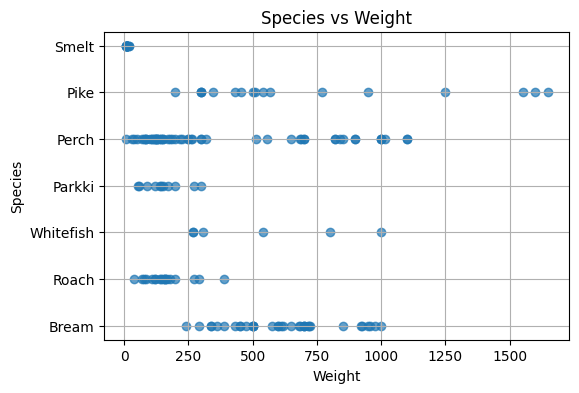

In [3]:
attributes = ['Length1', 'Length2', 'Length3', 'Height', 'Width', "Species"]

for attribute in attributes:
    plt.figure(figsize=(6, 4))
    plt.scatter(fish_data['Weight'], fish_data[attribute], alpha=0.7)
    plt.title(f'{attribute} vs Weight')
    plt.xlabel('Weight')
    plt.ylabel(attribute)
    plt.grid(True)
    plt.show()

** Remarks **
- for length 1-3, width, height, the relationship appears to be logrithmic than linear, which will  throw off our linear regression if left untreated

- to address this, we'll transform the depenedent variable to log(weight) and check again to see if we can salvage a linear relationship

# 2.1 - Data linearization 

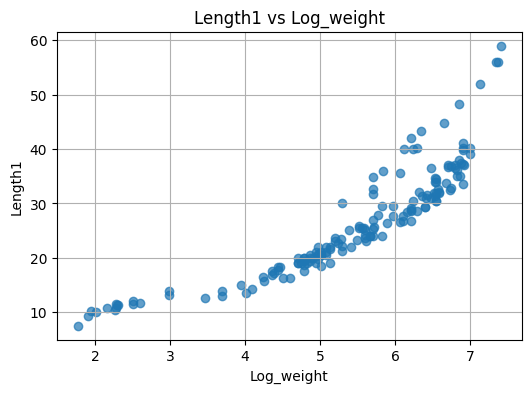

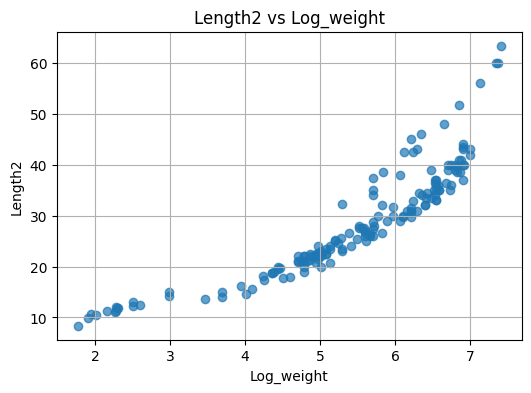

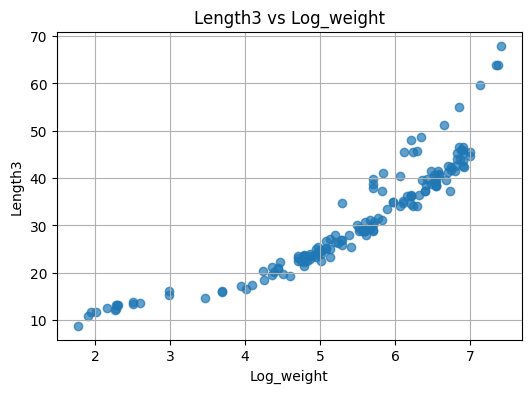

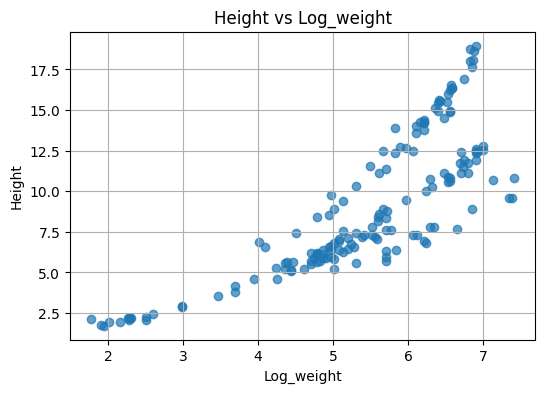

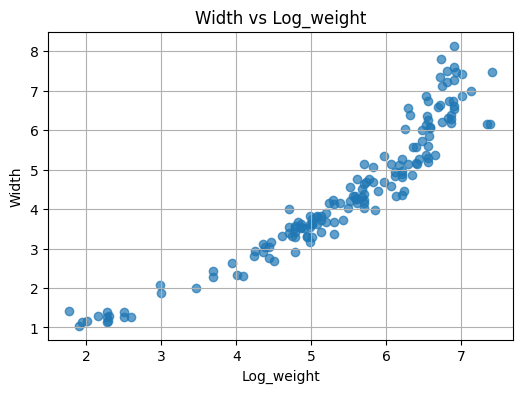

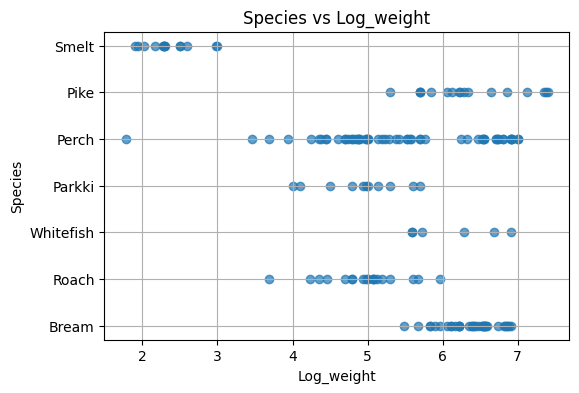

In [4]:
fish_data['Log_weight'] = np.log(fish_data['Weight'])

attributes = ['Length1', 'Length2', 'Length3', 'Height', 'Width', "Species"]
for attribute in attributes:
    plt.figure(figsize=(6, 4))
    plt.scatter(fish_data['Log_weight'], fish_data[attribute], alpha=0.7)
    plt.title(f'{attribute} vs Log_weight')
    plt.xlabel('Log_weight')
    plt.ylabel(attribute)
    plt.grid(True)
    plt.show()

** Remarks **

- Much better! There is still a bit of curvature left, but it is linear enough for us to proceed with linear regression.

# 3 - Running linear regression

- We'll define the following simple linear activation functions.

In [5]:
def linear_activation(x):
    return x

# 3.1 Initiate and train model(Linear activation)
- We split the data into training and testing set to avoid overfitting

- We train two single neuron model using the linear activation function, one using standarization and one without to see the effect of standarization on the result

- For now we assume a learning rate of 0.01

In [6]:


# --- Feature and Target
X = fish_data[['Width']].values
y = fish_data['Log_weight'].values

# --- Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# === 1. With Standardization ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_std = SingleNeuron(activation_function=linear_activation)
model_std.train(X_train_scaled, y_train, alpha=0.01, epochs = global_epochs)
y_pred_std = model_std.predict(X_test_scaled)


# === 2. Without Standardization ===
model_raw = SingleNeuron(activation_function=linear_activation)
model_raw.train(X_train, y_train, alpha=0.01, epochs = global_epochs)
y_pred_raw = model_raw.predict(X_test_scaled)




# 4 - Print and interpret output

- now that the model is trained, we will have it print out some performance metrics of the final regression. We will be using the Mean Standard Error, Root MSE, Mean Absolute Error, and R^2. This will be done for the standarized model for simplicity

- We want to gather information about the accuracy, spread, and how much of the variation is explained by the fitted model

In [7]:
# === Performance Metrics ===
mse_std = mean_squared_error(y_test, y_pred_std)
rmse_std = np.sqrt(mse_std)
mae_std = mean_absolute_error(y_test, y_pred_std)
r2_std = r2_score(y_test, y_pred_std)


# === Print Comparison ===
print("Standardized Model:")
print(f"  MSE:  {mse_std:.4f}")
print(f"  RMSE: {rmse_std:.4f}")
print(f"  MAE:  {mae_std:.4f}")
print(f"  R²:   {r2_std:.4f}\n")

Standardized Model:
  MSE:  0.2482
  RMSE: 0.4982
  MAE:  0.4006
  R²:   0.8720



** Remarks **

(the exact numbers might be different as I changed the global epoch number!)

- MSE (Mean Squared Error): 0.2482 — This is quite low, indicating that the model's predictions are very close to the actual values on average.

- RMSE (Root Mean Squared Error): 0.4982 — This is the square root of the MSE. A low RMSE value also suggests that our predictions are close to the true values, on average.

- MAE (Mean Absolute Error): 0.4006 — This is another measure of error, showing that the model is off by an average of about 0.4 units in terms of absolute difference from the true values.

- R^2: 0.8720 — Very strong result, meaning that the model explains 87.2% of the variance in the target variable.

As we can see, the linear model did a pretty good job at learning to predict the weight of fish based on various attributes. It is both accurate and consistent.


# 5 - Visualizing the regression
- we will visualize the result by plotting the fitted model over test and train data(distinguished by color)

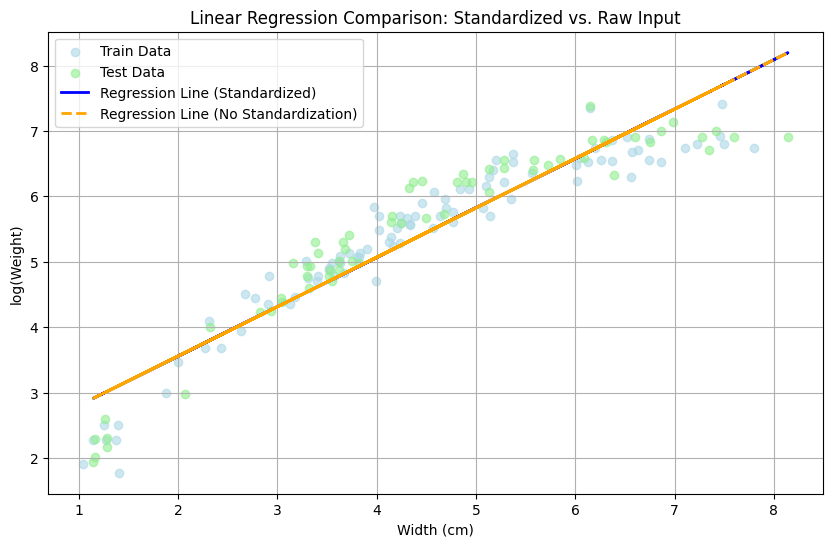

In [8]:
# --- Combined Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='lightblue', label='Train Data', alpha=0.6)
plt.scatter(X_test, y_test, color='lightgreen', label='Test Data', alpha=0.6)
plt.plot(X_test, y_pred_std, color='blue', linewidth=2, label='Regression Line (Standardized)')
plt.plot(X_test, y_pred_std, color='orange', linewidth=2, linestyle='--', label='Regression Line (No Standardization)')
plt.title('Linear Regression Comparison: Standardized vs. Raw Input')
plt.xlabel('Width (cm)')
plt.ylabel('log(Weight)')
plt.legend()
plt.grid(True)
plt.show()

** Remarks **
- we confirm our observations of the model's metrics, and it is indeed quite good with the line going through the clusters and following the linear trend. 

- we also note that the lines for the Standarized model and raw model overlapse, which means the differnce lies not in the resulting model, or the effects are diminished after large number of epochs.

- since the main point of standarization is to accelerate the MSE convergence, we'll take a look at exactly that

# 6 - Visualizing error over epochs for standarized and raw model
- We will plot the errors over opchs for both models to see if standarization had an inpact on the magnitude and slope of the error.

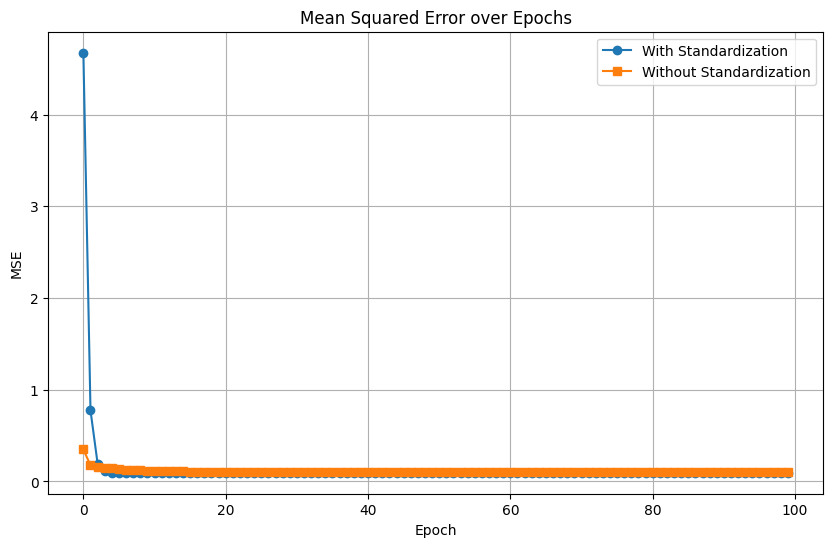

In [9]:
errors_std = model_std.errors_
errors_raw = model_raw.errors_

# --- Plot Error Comparison
plt.figure(figsize=(10, 6))
plt.plot(errors_std, label="With Standardization", marker='o')
plt.plot(errors_raw, label="Without Standardization", marker='s')
plt.title("Mean Squared Error over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

** Remarks **

- clearly, standarization served its purpose, with the error rapidly decreasing following an initial spike at the 1st epoch. This means it is definitely more computationaly efficient to use standarization as it drastically decreases the number of epochs needed to be run to get to an acceptable error level. 

# 7 - Sensitivity analysis of learning rate
- we know that the learning rate is one of, if not the most influential factor in machine learning. Therefore, we want to see how the regression result differs when we try different values of learning rates.

- here we define an array of different learning rates to try, which are then trained into their own models and plotted against the data. We should be able to see from the plots if the model differed greatly for the different learning rates.

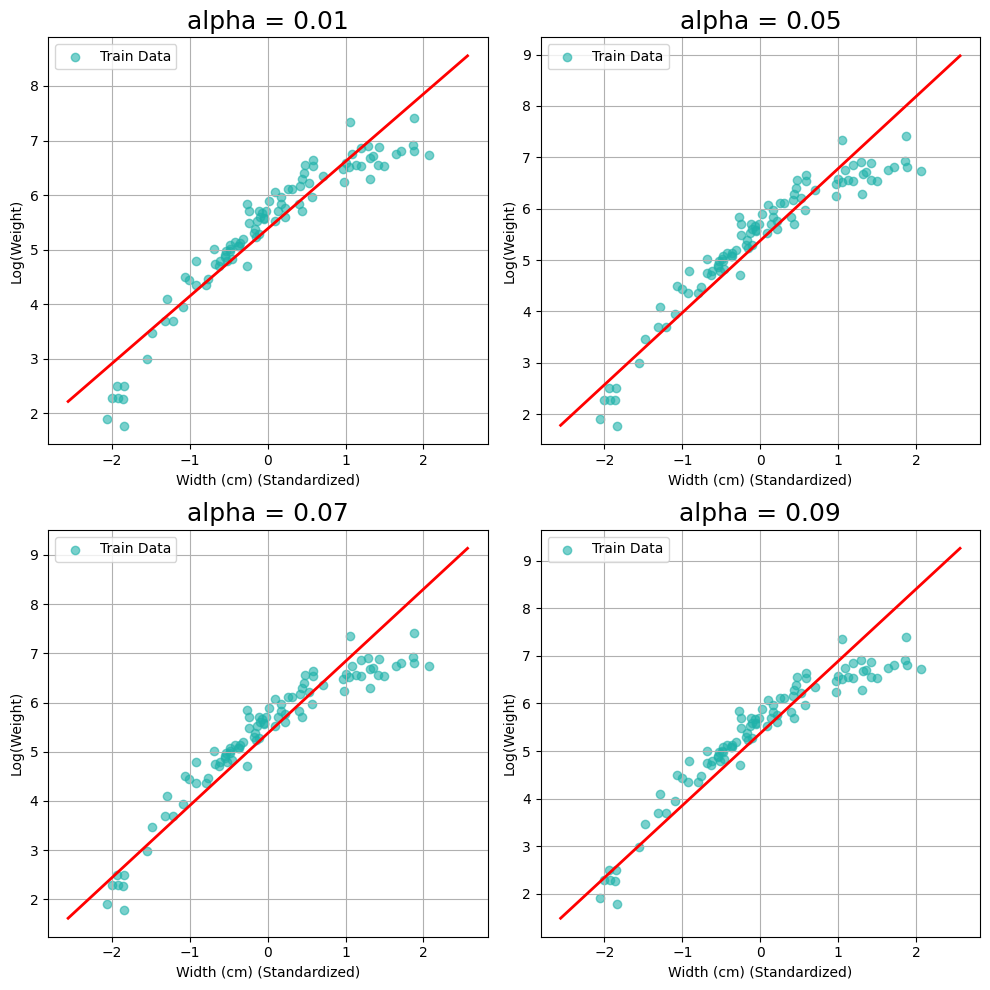

In [10]:
# --- Possible choices of learning rate
alphas = [0.01, 0.05, 0.07, 0.09]

# --- Generate a domain of values for plotting the regression line
domain = np.linspace(np.min(X_train_scaled) - 0.5, np.max(X_train_scaled) + 0.5, 100)

# --- Create the subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# --- Loop over the axes and alpha values
for ax, alpha in zip(axs.flat, alphas):
    # Train the model with the current learning rate
    model = SingleNeuron(activation_function=linear_activation)
    model.train(X_train_scaled, y_train, alpha=alpha, epochs = global_epochs)
    
    # Plot the regression line on the current axis (for the given alpha)
    ax.plot(domain, model.predict(domain.reshape(-1, 1)), color='red', linewidth=2)
    
    # Scatter the training data points on the current axis
    ax.scatter(X_train_scaled, y_train, color='lightseagreen', label="Train Data", alpha=0.6)
    
    # Set the title for the current subplot
    ax.set_title(f"alpha = {alpha}", fontsize=18)
    ax.set_xlabel('Width (cm) (Standardized)')
    ax.set_ylabel('Log(Weight)')
    ax.legend()
    ax.grid(True)

# --- Display the plots
plt.tight_layout()
plt.show()

** Remarks ** 
- Somewhat suprisingly, all the models seemed consistent and produced a pretty good linear model, with little differences between them. 

- I suspect it is due to the conservative set of learning rates I used (alphas = [0.01, 0.05, 0.07, 0.09]), which are all close enough to the original learning rate 0.01. Maybe trying more extreme values would throw the model off?

- Or this could also be a result of the large number of epochs used(100/500), so the impact of the learning rate is greatly diminished when viewed across the entire domain.

# Conclusion
- As we can see from the result, Linear Regression method worked great for this dataset. This makes sense as we know the weight of the fish is obviously dependent on the dimention and specie of the fish.

- its also important to note that this example also demonstrates how clearly non-linear data can still be transformed to fit linear regression using mathematical operations. Despite having to transform the dependent variable, the model worked well and preserved its prediction power and consistency. this will be a very valueble lesson for me in the future when I work with any dataset that doesn't immediately appear linear

- we also note that the effects of different learning rate was not nearly as noticable as I expected, but this is probably due to the large number of epochs we used - akin to how increasing sample size decreases the variance in a dataset.